In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from sklearn.datasets import load_iris

In [14]:
iris=load_iris()

In [6]:
#from sklearn.model_selection import train_test_split

In [9]:
#iris=pd.read_csv('iris.csv',sep=';',na_values='.')

In [16]:
#iris.head(5)

In [44]:
X_train,X_test, y_train,y_test=train_test_split(iris.data,iris.target)
#podzlieli nam zbiór na dane treningowe i testowe

In [45]:
X_train.shape

(112, 4)

In [46]:
X_test.shape

(38, 4)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
cls=KNeighborsClassifier(3)

In [49]:
cls

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [50]:
cls.fit(X_train,y_train)
#dopasowanie fit, czyli uczymy

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [51]:
y_pred=cls.predict(X_test)

In [52]:
y_pred

array([1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1])

In [53]:
#sprawdzamy, czy model jest ok

In [54]:
from sklearn.metrics import accuracy_score, classification_report

In [55]:
print(accuracy_score(y_pred,y_test))

0.9736842105263158


In [56]:
print(classification_report(y_pred,y_test))
#0, 1, 2 to klasy, czyli nasze gatunki, mamy precyzję odgadnięcia dla każdej klasy

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      0.93      0.96        14
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



In [57]:
#EKSPERYMENT RZUTU MONETĄ

In [58]:
import numpy as np

total_rzuty = 30
liczba_orlow = 24
prawd_orla = 0.5

# 0 = reszka, 1 = orzeł

In [59]:
# wygeneruj jeden eksperyment
experiment = np.random.randint(0,2,total_rzuty)

In [60]:
print("Dane Eksperymentalne :{}".format(experiment))

Dane Eksperymentalne :[0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0]


In [61]:
#Policz liczbę orłów, shape 0 znaczy, ze bierzemy pierwszą składową wyników
ile_orlow = experiment[experiment==1].shape[0]

In [62]:
print("Liczba orłów w eksperymencie:", ile_orlow )

Liczba orłów w eksperymencie: 16


In [68]:
def rzut_moneta_eksperyment(ile_razy_powtorzyc):
    head_count = np.empty([ile_razy_powtorzyc,1],dtype=int)
    for times in np.arange(ile_razy_powtorzyc):
        experiment = np.random.randint(0,2, total_rzuty)
        head_count[times] = experiment[experiment==1].shape[0]
    return head_count
#robimy funkcję

In [69]:
head_count = rzut_moneta_eksperyment(100)
head_count[:10]
print('Wymiar:{} \n Typ: {}'.format(head_count.shape,type(head_count)))

Wymiar:(100, 1) 
 Typ: <class 'numpy.ndarray'>


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline 
#% matplotlib inline, żeby wykresy wychodziły w jupiterze
import seaborn as sns
sns.set(color_codes = True)

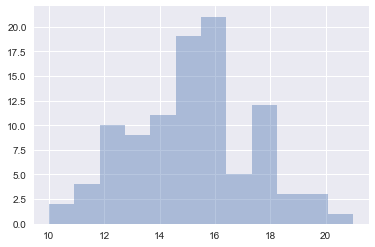

In [77]:
sns.distplot(head_count, kde=False)

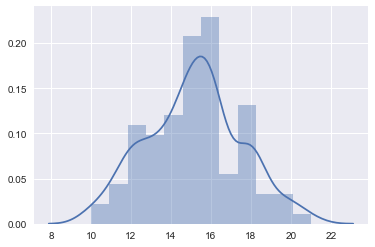

In [78]:
sns.distplot(head_count, kde=True)

In [83]:
print('Otrzymaliśmy {} orłów. Co stanowiło {} procent'.format(head_count[head_count >= 24].shape[0],(head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)))

Otrzymaliśmy 0 orłów. Co stanowiło 0.0 procent


In [84]:
#wyszło 0, bo prawdopodobieństwo jest bardzo małei zaokragla do 0

In [85]:
head_count = rzut_moneta_eksperyment(1000)
head_count[:10]
print('Wymiar:{} \n Typ: {}'.format(head_count.shape,type(head_count)))

Wymiar:(1000, 1) 
 Typ: <class 'numpy.ndarray'>


In [86]:
print('Otrzymaliśmy {} orłów. Co stanowiło {} procent'.format(head_count[head_count >= 24].shape[0],(head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)))

Otrzymaliśmy 1 orłów. Co stanowiło 0.1 procent


In [87]:
head_count = rzut_moneta_eksperyment(10000)
head_count[:10]
print('Wymiar:{} \n Typ: {}'.format(head_count.shape,type(head_count)))

Wymiar:(10000, 1) 
 Typ: <class 'numpy.ndarray'>


In [88]:
print('Otrzymaliśmy {} orłów. Co stanowiło {} procent'.format(head_count[head_count >= 24].shape[0],(head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)))

Otrzymaliśmy 12 orłów. Co stanowiło 0.12 procent


In [93]:
#to samo inaczej, jako weryfikacja, czy moneta jest uczciwa

def coin_toss_experiment(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    experiment = np.random.randint(0,2,[times_to_repeat,total_rzuty])
    return experiment.sum(axis=1)

#pętla po wszystkich wynikach, wżne wcięcia zmiast klamerek

In [97]:
coin_toss_experiment(10)

array([20, 17,  9, 17, 17, 12, 19, 13, 18, 18])